In [1]:
#Import above mentioned libraries.
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

## Reading from Dataset

In [2]:
from pathlib import Path

# dataset_url = link of the dataset
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = Path(data_dir)

print(data_dir)

228813984/228813984 [==============================] - 16s 0us/step
C:\Users\rachi\.keras\datasets\flower_photos


## Printing some examples

In [17]:
# visualizing the different flowers
#from IPython.display import Image

for flower in ['dandelion','tulips','daisy','sunflowers','roses']:
    fl = list(data_dir.glob(f'{flower}/*'))
    print(fl[0])
    PIL.Image.open(str(fl[0]))

C:\Users\rachi\.keras\datasets\flower_photos\dandelion\10043234166_e6dd915111_n.jpg
C:\Users\rachi\.keras\datasets\flower_photos\tulips\100930342_92e8746431_n.jpg
C:\Users\rachi\.keras\datasets\flower_photos\daisy\100080576_f52e8ee070_n.jpg
C:\Users\rachi\.keras\datasets\flower_photos\sunflowers\1008566138_6927679c8a.jpg
C:\Users\rachi\.keras\datasets\flower_photos\roses\10090824183_d02c613f10_m.jpg


## Preprocessing Training and Validation data

In [7]:
# take img height and img width as 180
img_height, img_width =180,180

# take batch size as 32
batch_size =32

# Preprocess the training data i.e., train_ds
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode ='categorical',
    validation_split =0.2,
    subset= 'training',
    seed =123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

# preprocess the validation data i.e., val_ds
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode ='categorical',
    validation_split =0.2,
    subset= 'validation',
    seed =123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


## Use pre-trained ResNet model

In [8]:
# declare a variable named resnet_model which will be equal to sequential
resnet_model = Sequential()

# use pretrained_model
pretrained_model = keras.applications.ResNet50(include_top=False, input_shape=(180,180,3), pooling='avg',
                                                classes=5, weights='imagenet')


for layer in pretrained_model.layers:
        layer.trainable =False

resnet_model.add(pretrained_model)

# add flatten
resnet_model.add(Flatten())

# add a Dense layer of 512 neurons and give activation as 'relu'
resnet_model.add(Dense(512, activation='relu'))

# add a dense layer of 5 neurons and give activation as 'softmax'
resnet_model.add(Dense(5, activation='softmax'))

# call the summary attribute of the model
resnet_model.summary()

94765736/94765736 [==============================] - 8s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


## Training

In [9]:
# compile the model with Adam(lr=0.001) optimizer, use categorical_crossentropy as loss, and metrics will be equal to accuracy
resnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics= 'accuracy')

# train upto 10 epochs
# fit the model in history variable
resnet1 = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10,)

Epoch 1/10
92/92 [==============================] - 341s 4s/step - loss: 0.7285 - accuracy: 0.7735 - val_loss: 0.4295 - val_accuracy: 0.8515
Epoch 2/10
92/92 [==============================] - 338s 4s/step - loss: 0.2962 - accuracy: 0.8883 - val_loss: 0.3770 - val_accuracy: 0.8651
Epoch 3/10
92/92 [==============================] - 336s 4s/step - loss: 0.1792 - accuracy: 0.9373 - val_loss: 0.3811 - val_accuracy: 0.8638
Epoch 4/10
92/92 [==============================] - 333s 4s/step - loss: 0.0985 - accuracy: 0.9721 - val_loss: 0.4745 - val_accuracy: 0.8474
Epoch 5/10
92/92 [==============================] - 340s 4s/step - loss: 0.0568 - accuracy: 0.9888 - val_loss: 0.3898 - val_accuracy: 0.8760
Epoch 6/10
92/92 [==============================] - 297s 3s/step - loss: 0.0305 - accuracy: 0.9963 - val_loss: 0.4030 - val_accuracy: 0.8747
Epoch 7/10
92/92 [==============================] - 323s 4s/step - loss: 0.0155 - accuracy: 0.9990 - val_loss: 0.4255 - val_accuracy: 0.8774
Epoch 8/10
92

## Printing plots

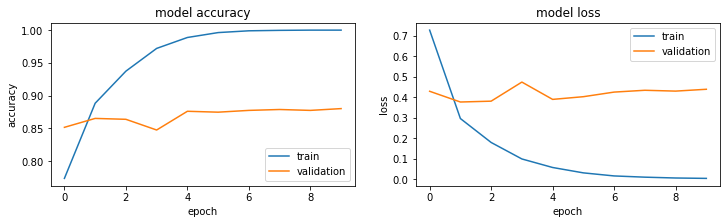

In [12]:
plt.figure(1, figsize = (12,3))

plt.subplot(121)
plt.plot(resnet1.history['accuracy'])
plt.plot(resnet1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.subplot(122)
plt.plot(resnet1.history['loss'])
plt.plot(resnet1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()

## Better model with dropout regularization

In [10]:
# declare a variable named resnet_model which will be equal to sequential
model = Sequential()

# use pretrained_model
pretrained_model = keras.applications.ResNet50(include_top=False, pooling='avg',
                                                classes=5, weights='imagenet')


for layer in pretrained_model.layers:
        layer.trainable =False

model.add(pretrained_model)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 24,113,541
Trainable params: 525,829
Non-trainable params: 23,587,712
_________________________________________________________________


## Training

In [11]:
# compile the model with Adam(lr=0.001) optimizer, use categorical_crossentropy as loss, and metrics will be equal to accuracy
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics= 'accuracy')

resnet2 = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
92/92 [==============================] - 332s 4s/step - loss: 0.8713 - accuracy: 0.6975 - val_loss: 0.4412 - val_accuracy: 0.8474
Epoch 2/10
92/92 [==============================] - 341s 4s/step - loss: 0.4854 - accuracy: 0.8198 - val_loss: 0.3771 - val_accuracy: 0.8488
Epoch 3/10
92/92 [==============================] - 328s 4s/step - loss: 0.4250 - accuracy: 0.8420 - val_loss: 0.3562 - val_accuracy: 0.8638
Epoch 4/10
92/92 [==============================] - 281s 3s/step - loss: 0.3667 - accuracy: 0.8699 - val_loss: 0.3285 - val_accuracy: 0.8760
Epoch 5/10
92/92 [==============================] - 262s 3s/step - loss: 0.3158 - accuracy: 0.8835 - val_loss: 0.3449 - val_accuracy: 0.8624
Epoch 6/10
92/92 [==============================] - 257s 3s/step - loss: 0.2871 - accuracy: 0.8988 - val_loss: 0.3205 - val_accuracy: 0.8733
Epoch 7/10
92/92 [==============================] - 255s 3s/step - loss: 0.2626 - accuracy: 0.8982 - val_loss: 0.3255 - val_accuracy: 0.8706
Epoch 8/10
92

## Plotting

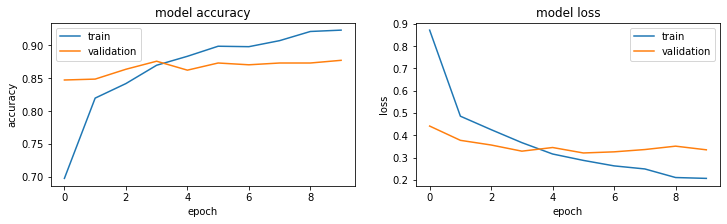

In [13]:
plt.figure(1, figsize = (12,3))

plt.subplot(121)
plt.plot(resnet2.history['accuracy'])
plt.plot(resnet2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.subplot(122)
plt.plot(resnet2.history['loss'])
plt.plot(resnet2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()

## Predictions

C:\Users\rachi\.keras\datasets\flower_photos\sunflowers\14646279002_9cdf97be97_n.jpg


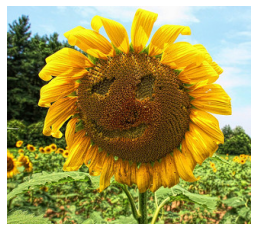

1/1 [==============================] - 0s 132ms/step
Label: sunflowers, Probability: 0.9447


In [45]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import random
import matplotlib.image as mpimg

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Predict the label for the image
def predict_image_label(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    preds = model.predict(img_array)
    return preds

def select_random_file(directory_path):
    # List all files in the given directory
    all_files = os.listdir(directory_path)
    
    # Filter out directories, keep only files
    files = [f for f in all_files if os.path.isfile(os.path.join(directory_path, f))]
    
    # Select a random file from the list of files
    random_file = random.choice(files)
    
    return random_file


flower_path = f"{data_dir}\\sunflowers"
img_path = f"{flower_path}\\{select_random_file(flower_path)}"
print(img_path)

plt.imshow(mpimg.imread(img_path))
plt.axis('off')  # Hide axes
plt.show()

predictions = predict_image_label(model, img_path)

classes = ['dandelion','tulips','daisy','sunflowers','roses']
class_labels = {index: val for index, val in enumerate(classes)}

# Find the top prediction
top_pred_index = np.argmax(predictions[0])
top_pred_label = class_labels[top_pred_index]
top_pred_prob = predictions[0][top_pred_index]

print(f"Label: {top_pred_label}, Probability: {top_pred_prob:.4f}")

## Confusion matrix and Classification report

Found 3670 images belonging to 5 classes.
115/115 [==============================] - 194s 2s/step


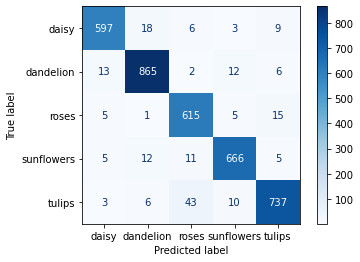

              precision    recall  f1-score   support

       daisy       0.96      0.94      0.95       633
   dandelion       0.96      0.96      0.96       898
       roses       0.91      0.96      0.93       641
  sunflowers       0.96      0.95      0.95       699
      tulips       0.95      0.92      0.94       799

    accuracy                           0.95      3670
   macro avg       0.95      0.95      0.95      3670
weighted avg       0.95      0.95      0.95      3670



In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

test_datagen = ImageDataGenerator(rescale=1.)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Generate and print the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)